In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('placement.csv')

In [67]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


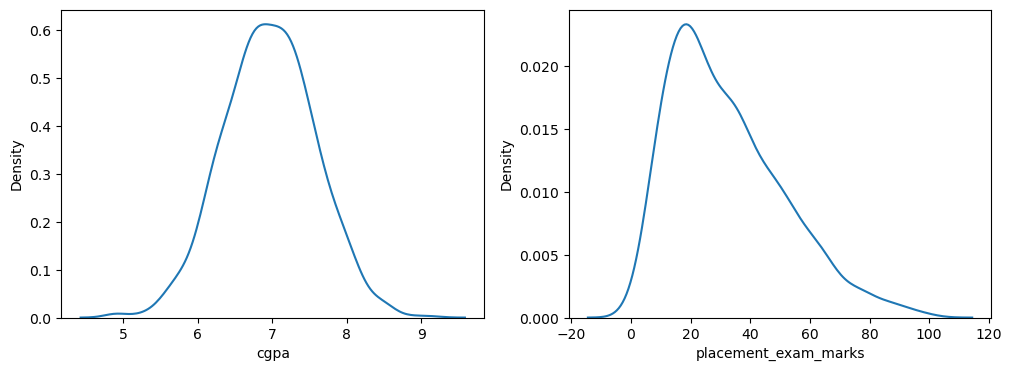

In [68]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'])
#Very close to normal distribution
plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'])
plt.show()
#skewed

In [69]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

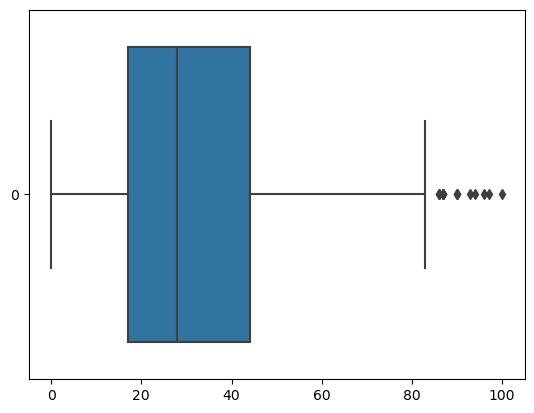

In [70]:
sns.boxplot(df['placement_exam_marks'],orient='h')
plt.show()

In [71]:
perectile25 = df['placement_exam_marks'].quantile(0.25)
perectile75 = df['placement_exam_marks'].quantile(0.75)
iqr = perectile75-perectile25

In [72]:
upper_limit=perectile75+1.5*iqr
lower_limit=perectile25-1.5*iqr

In [73]:
#Outliers
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [74]:
 df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


## 1 Trimming 

In [75]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [76]:
new_df.shape

(985, 3)

### plotting before vs after trimming

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


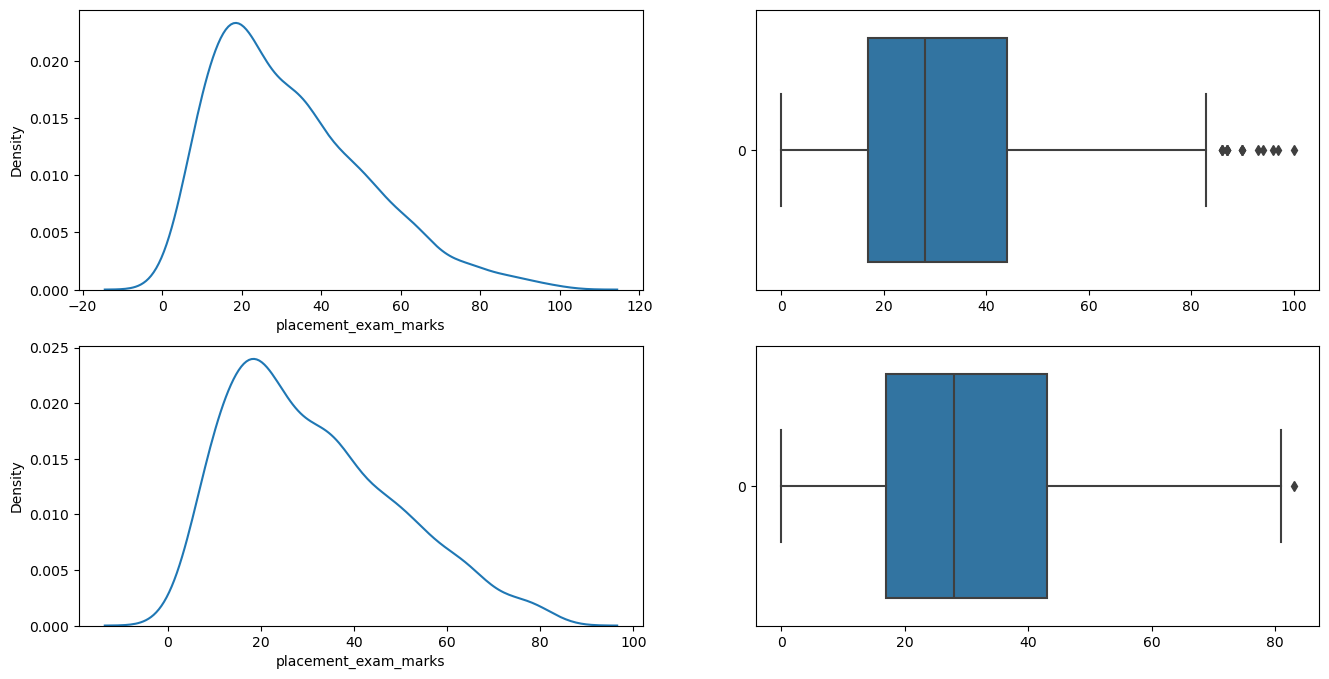

In [77]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])
#Very close to normal distribution
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.kdeplot(new_df['placement_exam_marks'])
#Very close to normal distribution
plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'],orient='h')

plt.show()

## 2]Capping

In [84]:
new2_df = df.copy()
new2_df['placement_exam_marks'] = np.where(new2_df['placement_exam_marks'] > upper_limit, upper_limit, new2_df['placement_exam_marks'])

In [85]:
new2_df['placement_exam_marks']=np.where(new2_df['placement_exam_marks'] < lower_limit,lower_limit,new2_df['placement_exam_marks'])

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


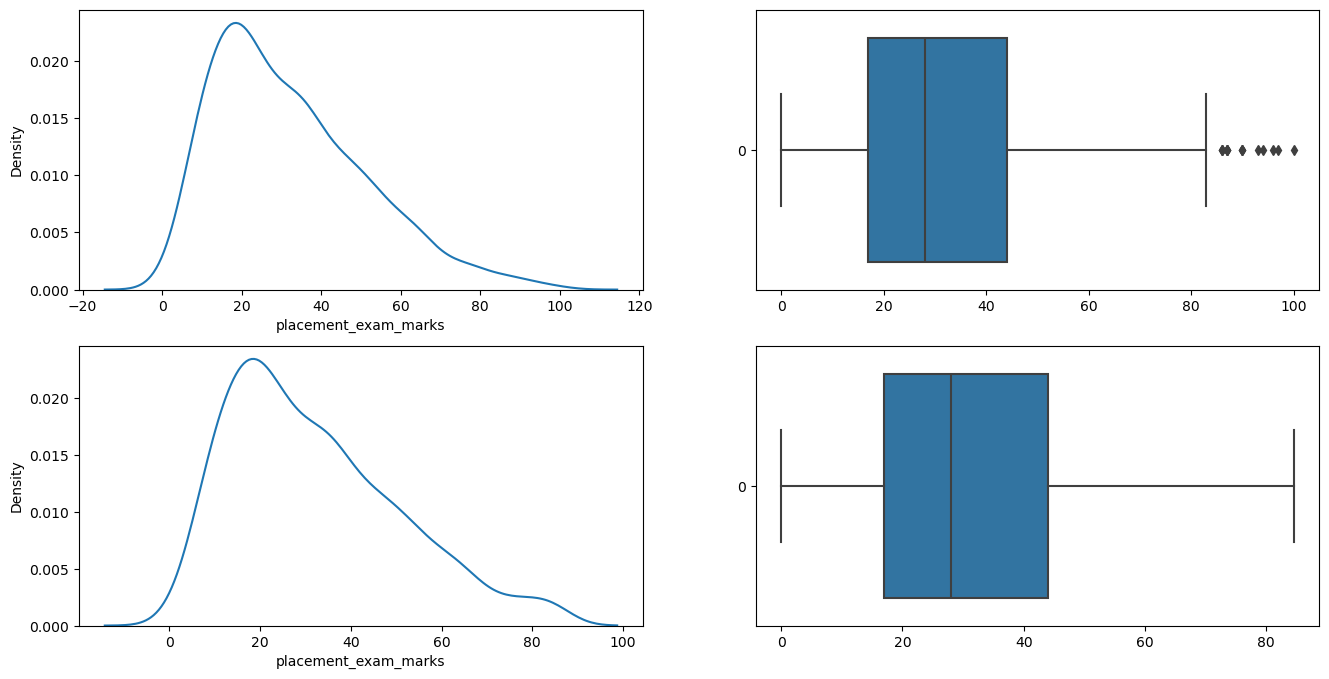

In [86]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.kdeplot(new2_df['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(new2_df['placement_exam_marks'],orient='h')

plt.show()